# Logistic Regression
### (a)

### $\frac{\partial g(z)}{\partial z}
= -\frac{1}{\left( 1+e^{-z} \right)^2}\times -e^{-z} 
= \frac{1}{1+e^{-z}} \times \frac{e^{-z}}{1 + e^{-z}}
= g(z)(1-g(z))$

### $\text{let } z = y^{(k)}\theta^Tx^{(k)}$

### $\frac{\partial J(\theta)}{\partial \theta_i}
 = -\frac{1}{m}\sum_{k=1}^m \frac{1}{g(z)} \times 
 \frac{\partial g(z)}{\partial z}\times 
 \frac{\partial z}{\partial \theta_i}
 = \frac{1}{m}\sum_{k=1}^m(g(z)-1)y^{(k)}x^{(k)}$

### $\text{hessian } H_{ij} = \frac {\partial J(\theta)}{\partial \theta_i \partial \theta_j}
 = \frac{1}{m} \sum_{k=1}^m \frac{\partial(g(z) -1)}{\partial \theta_j}y^{(k)}x^{(k)}
 = \frac{1}{m} \sum_{k=1}^m g(z)(1-g(z))x^{(k)}_i x^{(k)}_j$

###  $z^THz = \sum_{i=1}^n\sum_{j=1}^nz_iH_{ij}z_j = \sum_{i=1}^n\sum_{j=1}^nz_iz_j \times
\big[\frac{1}{m} \sum_{k=1}^m g(z)(1-g(z))x^{(k)}_i x^{(k)}_j\big]$


### $\text{since} 
\begin{cases} 
1 \geq (y^{(k)})^2 \geq 0 \\
1 \geq g(z) \geq 0 
\end{cases} \Rightarrow \text{Prove that } \sum_{i=1}^n\sum_{j=1}^nz_ix_ix_jz_j \geq 0$

### $\sum_{i=1}^n\sum_{j=1}^nz_ix_ix_jz_j = (x^Tz)^2 \geq 0$

### $\text{Therefore } z^THz \geq 0 \text{ }\forall z$

### (b)

In [41]:
#import needed packages first

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

%matplotlib inline

In [42]:
#Read files and create x and y arrays

x = pd.read_csv('data/logistic_x.txt', header=None, sep='\s+')
y = pd.read_csv('data/logistic_y.txt', header=None)
x = x.values
y = y.astype(int).values

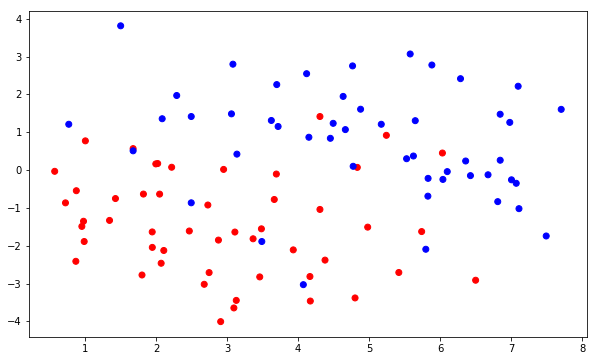

In [43]:
#Visualize to watch for pattern

colors = ['red' if i==-1 else 'blue' for i in y]
plt.figure(figsize=(10,6))
plt.scatter(x[:,0], x[:,1], c=colors)

In [44]:
#theta 0 initialize

x = np.hstack((np.ones((x.shape[0], 1)), x))
y = y.reshape(x.shape[0])

In [45]:
thetaChange = []
theta = np.zeros(x.shape[1])
iteration = 0
threshold = 1e9

#while threshold > e{-6}, keep calculate the theta

while threshold > 1e-6:
    hessian = np.zeros((x.shape[1], x.shape[1]))
    gzs = 1 / (1 + np.exp(-y * x.dot(theta)))
    
    #first derivative derived from problem a
    oneDeriv = np.mean((gzs - 1) * y * x.T, axis=1)
    
    #loop and get the hessian matrix
    for i in range(x.shape[1]):
        for j in range(x.shape[1]):
            if i <= j:
                hessian[i][j] = np.mean(gzs * (1 - gzs) * x[:,i] * x[:,j])
                if i != j:
                    hessian[j][i] = hessian[i][j]
    old_theta = theta.copy()
    
    #calculate the delta to reduce the original theta
    delta = np.linalg.inv(hessian).dot(oneDeriv)
    theta -= delta
    thetaChange.append(theta.copy())
    iteration += 1
    threshold = np.mean(np.abs(delta))
print('Newton mehtod converge in {0} time'.format(iteration))

Newton mehtod converge in 7 time


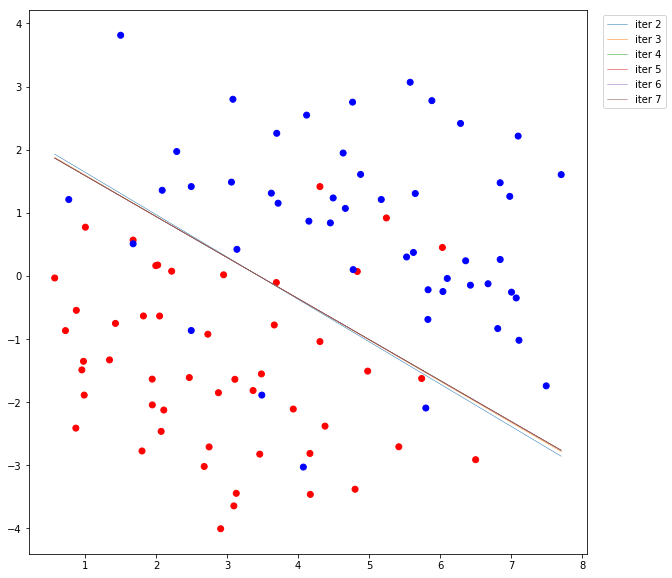

In [46]:
#plot the scatterplot and lines change

plt.figure(figsize=(10,10))
plt.scatter(x[:,1], x[:,2], c=colors)
xChart = np.array([np.min(x[:,1]), np.max(x[:,1])])
for (k, theta) in enumerate(thetaChange):
    if(k != 0):
        yChart = (theta[0] + theta[1] * xChart) / -theta[2]
        plt.plot(xChart, yChart, label='iter {0}'.format(k + 1), lw=0.5)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))